In [56]:
#Load python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the competitors' pricing data from a CSV file
competitors_pricing = pd.read_csv (r"C:\Users\DELL\Downloads\Competitors pricing.csv")

# Display basic information about the dataset, including data types and non null counts
competitors_pricing_info = competitors_pricing.info()

#display the first few rows of the dataset to get an initial overview of the data
competitors_pricing_head = competitors_pricing.head()

#output the basic information and first few rows together for a review
competitors_pricing_info, competitors_pricing_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fiscal_week_id  10000 non-null  object 
 1   item_id         10000 non-null  int64  
 2   merchant_id     10000 non-null  int64  
 3   merchant_name   10000 non-null  object 
 4   city            10000 non-null  object 
 5   address         10000 non-null  object 
 6   state           10000 non-null  object 
 7   zipcode         10000 non-null  int64  
 8   price           10000 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 703.3+ KB


(None,
   fiscal_week_id     item_id  merchant_id merchant_name    city address  \
 0        2019-11   991944605   2375539243    merchant37  city37  city37   
 1        2019-15  1163151894   7767507093    merchant31  city31  city31   
 2        2019-12    40066459   2542078802    merchant18  city18  city18   
 3        2019-11  9892616029   9528648021    merchant48  city48  city48   
 4        2019-15  8587179516   3431263330    merchant11  city11  city11   
 
      state  zipcode   price  
 0  state37    49995  259.45  
 1  state31    35838  255.21  
 2  state18    63431  117.41  
 3  state48    44553  135.63  
 4  state11    90965   92.92  )

In [57]:
# Descriptive statistics for numeric columns
descriptive_stats = competitors_pricing.describe()

# Checking unique values in categorical columns to understand the diversity
unique_values = {
    'fiscal_week_id': competitors_pricing['fiscal_week_id'].nunique(),
    'item_id': competitors_pricing['item_id'].nunique(),
    'merchant_id': competitors_pricing['merchant_id'].nunique(),
    'merchant_name': competitors_pricing['merchant_name'].nunique(),
    'city': competitors_pricing['city'].nunique(),
    'state': competitors_pricing['state'].nunique(),
    'zipcode': competitors_pricing['zipcode'].nunique()
}

descriptive_stats, unique_values

(            item_id   merchant_id       zipcode         price
 count  1.000000e+04  1.000000e+04  10000.000000  10000.000000
 mean   5.289909e+09  5.442145e+09  57490.031900    174.280887
 std    3.014793e+09  2.867880e+09  21456.422996     71.548803
 min    4.006646e+07  1.555563e+08  20280.000000     47.950000
 25%    2.612616e+09  2.854756e+09  37304.000000    118.627500
 50%    5.565170e+09  5.783217e+09  57949.000000    162.510000
 75%    8.258242e+09  8.040081e+09  75415.000000    237.335000
 max    9.955717e+09  9.776340e+09  96171.000000    313.640000,
 {'fiscal_week_id': 5,
  'item_id': 200,
  'merchant_id': 100,
  'merchant_name': 100,
  'city': 100,
  'state': 100,
  'zipcode': 100})

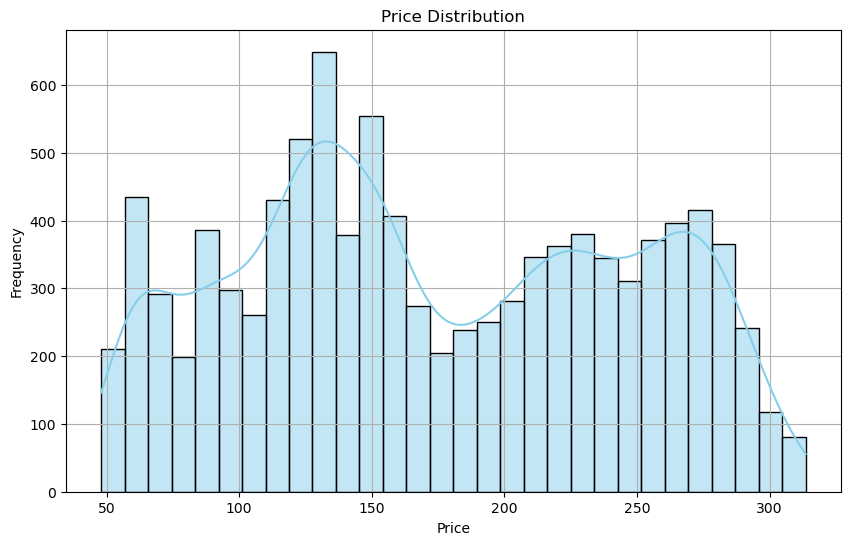

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of prices from the competitors' data using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(competitors_pricing['price'], bins=30, kde=True, color='skyblue') #adding KDE for better visualization
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Somewhat normal distribution, peak around 100 -200 range.

In [59]:
# Append '-0' to fiscal_week_id to represent Monday (start of the week)
competitors_pricing['fiscal_week_id'] = competitors_pricing['fiscal_week_id'] + '-1'  # '-1' represents Monday

# Now, convert to datetime
competitors_pricing['fiscal_week_id'] = pd.to_datetime(competitors_pricing['fiscal_week_id'], format='%Y-%U-%w')

print(competitors_pricing['fiscal_week_id'])

0      2019-03-18
1      2019-04-15
2      2019-03-25
3      2019-03-18
4      2019-04-15
          ...    
9995   2019-03-18
9996   2019-04-08
9997   2019-03-18
9998   2019-03-18
9999   2019-04-01
Name: fiscal_week_id, Length: 10000, dtype: datetime64[ns]


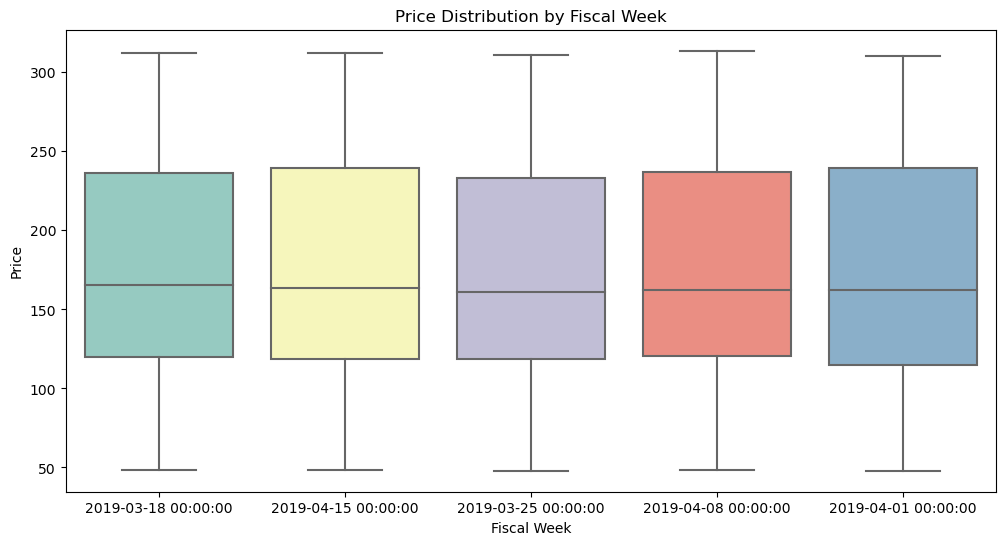

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Price distribution per fiscal week
plt.figure(figsize=(12, 6))
sns.boxplot(x='fiscal_week_id', y='price', data=competitors_pricing, palette='Set3')  # Added 'data=competitors_pricing'
plt.title('Price Distribution by Fiscal Week')
plt.xlabel('Fiscal Week')
plt.ylabel('Price')
plt.show()

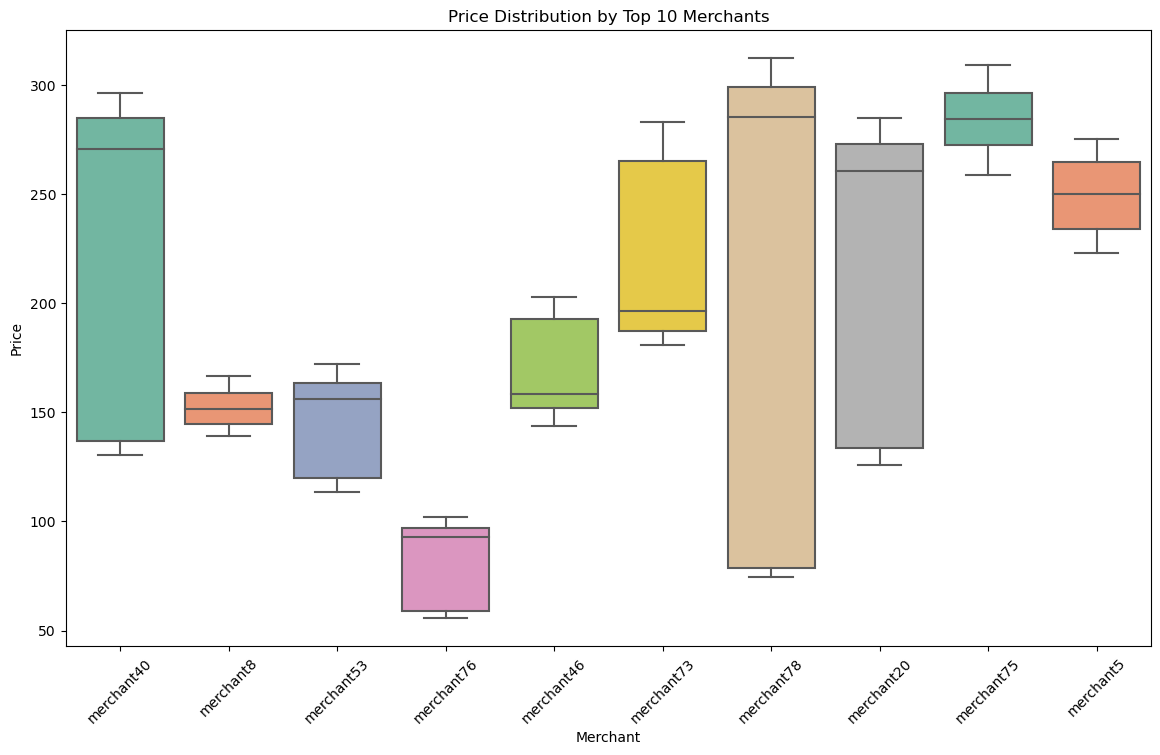

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the size of the plot
plt.figure(figsize=(14, 8))

# Get the top 10 merchants
top_merchants = competitors_pricing['merchant_name'].value_counts().nlargest(10).index

# Create the boxplot
sns.boxplot(
    x='merchant_name', 
    y='price', 
    data=competitors_pricing[competitors_pricing['merchant_name'].isin(top_merchants)],  # Use 'data=' not 'competitors_pricing='
    palette='Set2'
)

# Set plot titles and labels
plt.title('Price Distribution by Top 10 Merchants')
plt.xlabel('Merchant')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [63]:
#generate descriptive statistics of prices grouped by merchant name
competitors_pricing.groupby('merchant_name')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
merchant_name,,,,,,,,
merchant0,109.0,137.333486,8.498952,124.98,129.7900,136.280,144.2000,152.22
merchant1,109.0,115.702202,25.963366,86.61,91.3300,94.610,143.2000,148.32
merchant10,99.0,144.972525,98.036064,47.95,50.4300,52.870,244.2950,257.74
merchant11,102.0,163.916667,63.193227,89.45,93.8650,209.760,222.5725,229.15
merchant12,104.0,140.175865,12.520899,122.79,129.4625,134.120,152.2825,160.06
...,...,...,...,...,...,...,...,...
merchant95,95.0,90.699368,28.432046,54.37,57.7400,110.000,114.9450,120.16
merchant96,95.0,253.973158,7.593291,239.84,248.4800,252.490,260.3400,271.10
merchant97,98.0,119.767653,52.832998,62.83,66.2625,163.020,171.4700,178.74
